In [1]:
import utils as m

df = m.simulate_hsv_sample(1000, 0.6, 0.8, 100, 0.1)
df

,income,net_income,working,household_size
0,25982.891872,10335.698993,2,5
1,32052.120085,4778.925680,3,3
2,52763.947307,12245.460377,2,5
3,24393.787837,5373.964012,1,1
4,25753.463246,5691.794804,3,3
...,...,...,...,...
995,40868.014308,4449.745806,5,5
996,33637.752357,5770.093072,2,2
997,63382.229007,6820.516931,3,3
998,10344.411848,3611.469264,2,2


# OLS

In [2]:
model = m.generate_ols_model(df)

# Note that estimated tau is 1 - (coefficient on income).
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:26:48   Log-Likelihood:                 906.43
No. Observations:                1000   AIC:                            -1807.
Df Residuals:                     997   BIC:                            -1792.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5526      0.039    116.864      0.000       4.476       4.629
income             0.4055      0.004    104.966      0.000       0.398       0.413
household_size     0.7981      0.005    148.527      0.000       0.788       0.809
==============================================================================
Omnibus:                        2.112   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                2.044
Skew:                          -0.058   Prob(JB):                        0.360
Kurtosis:                       3.188   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# Sigma estimate
sigma_hat = m.get_sigma_hat(model)
sigma_hat

0.09774761516946602

In [4]:
model.params

const             4.552563
income            0.405458
household_size    0.798113
dtype: float64

## Monte Carlo With OLS

In [5]:
import matplotlib.pyplot as plt

ols_tau_estimates = []
ols_theta_estimates = []
ols_sigma_estimates = []
for _ in range(500):
    df = m.simulate_hsv_sample(1000, 0.6, 0.8, 100, 0.1)
    model = m.generate_ols_model(df)
    sigma_hat = m.get_sigma_hat(model)
    ols_sigma_estimates.append(sigma_hat)
    ols_tau_estimates.append(1 - model.params.iloc[1])
    ols_theta_estimates.append(model.params.iloc[2])

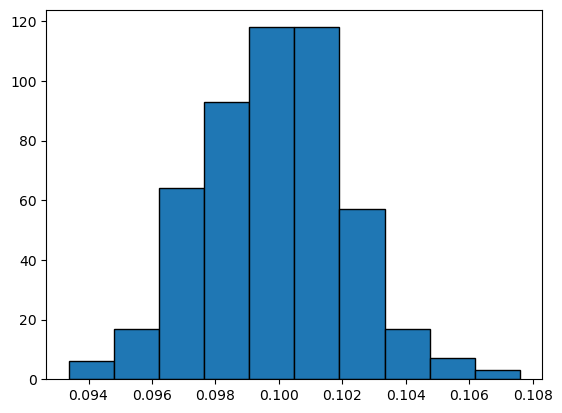

In [6]:
plt.hist(ols_sigma_estimates, edgecolor='black')
plt.show()

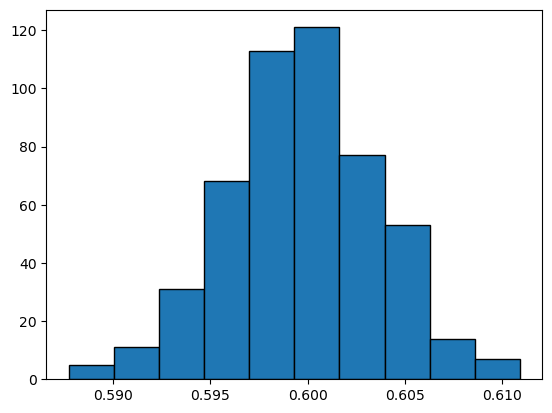

In [7]:
plt.hist(ols_tau_estimates, edgecolor='black')
plt.show()

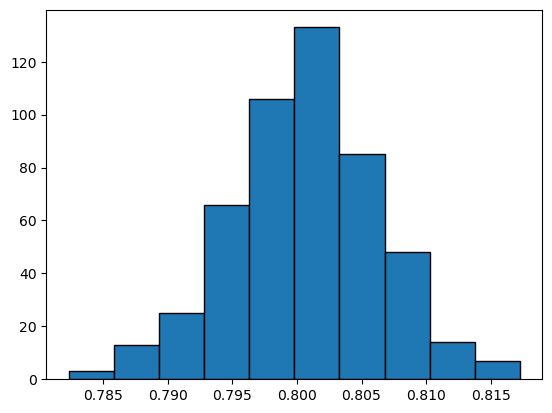

In [8]:
plt.hist(ols_theta_estimates, edgecolor='black')
plt.show()

## Check OLS consistency

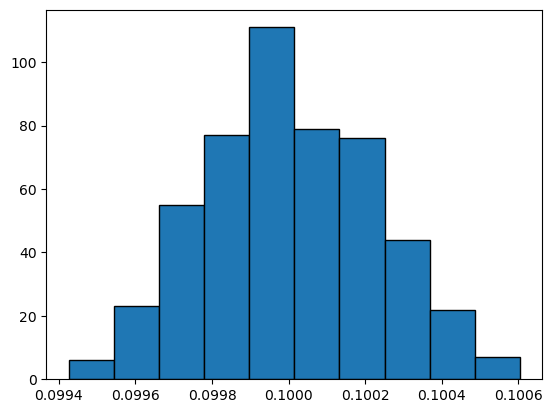

In [ ]:
# Increase each sample size by 100x. Check sigma estimate only
ols_sigma_estimates_2 = []
for _ in range(500):
    df = m.simulate_hsv_sample(100000, 0.6, 0.8, 100, 0.1)
    model = m.generate_ols_model(df)
    sigma_hat = m.get_sigma_hat(model)
    ols_sigma_estimates_2.append(sigma_hat)

plt.hist(ols_sigma_estimates_2, edgecolor='black')
plt.show()

Estimates are much closer to the true estimate.

# MLE

In [9]:
initial_params = [0.6, 1, 0.5]
model = m.generate_mle_model(df, initial_params)
model.x

Estimates are [ 1.08466118  0.87296109 -0.37696331].


array([ 1.08466118,  0.87296109, -0.37696331])

## Monte Carlo With MLE

In [ ]:
mle_tau_estimates = []
mle_theta_estimates = []
mle_sigma_estimates = []
for _ in range(500):
    df = m.simulate_hsv_sample(1000, 0.6, 0.8, 100, 0.1)
    model = m.generate_mle_model(df, initial_params)
    mle_sigma_estimates.append(model.x[2])
    mle_tau_estimates.append(model.x[0])
    mle_theta_estimates.append(model.x[1])

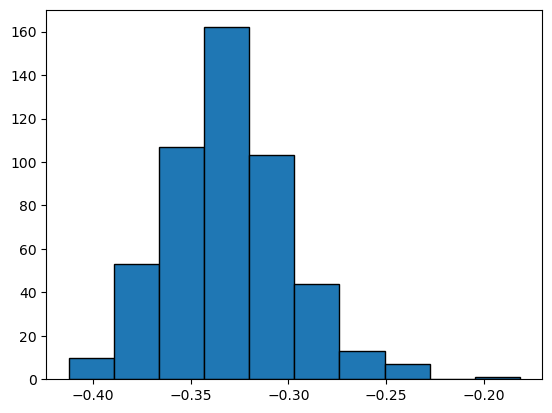

In [11]:
plt.hist(mle_sigma_estimates, edgecolor='black')
plt.show()

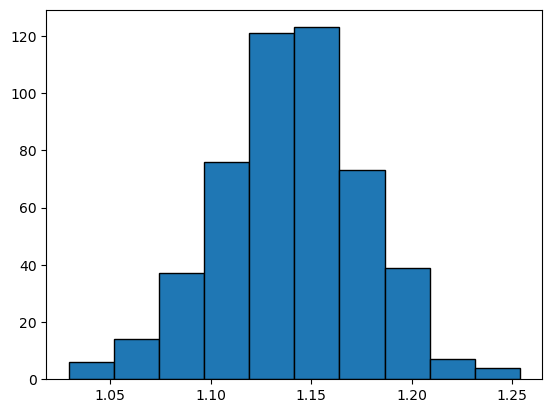

In [12]:
plt.hist(mle_tau_estimates, edgecolor='black')
plt.show()

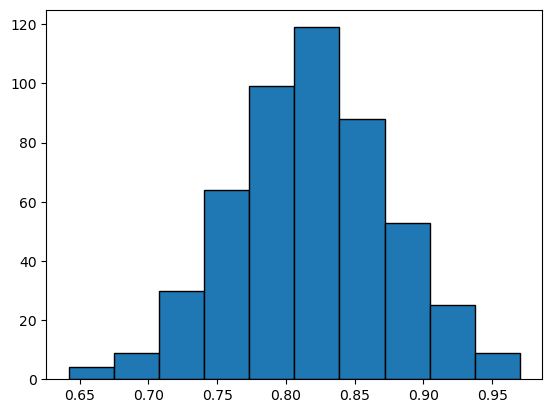

In [13]:
plt.hist(mle_theta_estimates, edgecolor='black')
plt.show()